In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample sales data
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/superstore.csv')

# Data Preprocessing
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Metrics Calculation
# 1. Total Sales Revenue
total_sales = data['Sales'].sum()

# 2. Total Orders
total_orders = data['Order ID'].nunique()

# 3. Sales Conversion Rate (assuming session data is available, here using random sessions)
import numpy as np
sessions = total_orders + np.random.randint(500, 1000)  # Simulating session data
sales_conversion_rate = (total_orders / sessions) * 100

# 4. Average Order Value (AOV)
avg_order_value = total_sales / total_orders

# 5. Units Sold
units_sold = data['Quantity'].sum()

# 6. Cart Abandonment Rate (simulated)
carts_created = total_orders + np.random.randint(100, 300)
cart_abandonment_rate = ((carts_created - total_orders) / carts_created) * 100

# 7. Sales by Category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 8))

# Total Sales
plt.subplot(2, 2, 1)
plt.title('Total Sales Revenue')
plt.bar(['Total Sales'], [total_sales], color='skyblue')

# Sales Conversion Rate
plt.subplot(2, 2, 2)
plt.title('Sales Conversion Rate')
plt.bar(['Conversion Rate'], [sales_conversion_rate], color='lightgreen')

# Average Order Value
plt.subplot(2, 2, 3)
plt.title('Average Order Value')
plt.bar(['AOV'], [avg_order_value], color='salmon')

# Sales by Category
plt.subplot(2, 2, 4)
plt.title('Sales by Category')
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='muted')

plt.tight_layout()
plt.show()

# Display Metrics
print(f'Total Sales Revenue: ${total_sales:,.2f}')
print(f'Sales Conversion Rate: {sales_conversion_rate:.2f}%')
print(f'Average Order Value (AOV): ${avg_order_value:.2f}')
print(f'Units Sold: {units_sold}')
print(f'Cart Abandonment Rate: {cart_abandonment_rate:.2f}%')

HTTPError: HTTP Error 404: Not Found

In [3]:
df=pd.read_csv('online_sales_dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          49782 non-null  int64         
 1   StockCode          49782 non-null  object        
 2   Description        49782 non-null  object        
 3   Quantity           49782 non-null  int64         
 4   InvoiceDate        49782 non-null  datetime64[ns]
 5   UnitPrice          49782 non-null  float64       
 6   CustomerID         44804 non-null  float64       
 7   Country            49782 non-null  object        
 8   Discount           49782 non-null  float64       
 9   PaymentMethod      49782 non-null  object        
 10  ShippingCost       47293 non-null  float64       
 11  Category           49782 non-null  object        
 12  SalesChannel       49782 non-null  object        
 13  ReturnStatus       49782 non-null  object        
 14  Shipme

# feature engineering

In [8]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [9]:
df['sales_year']=df['InvoiceDate'].dt.year

In [10]:
df['sales_month']=df['InvoiceDate'].dt.month

In [11]:
df['sales_date']=df['InvoiceDate'].dt.day

In [12]:
df['sales_day']=df['InvoiceDate'].dt.dayofweek

In [13]:
df['sales_date'].value_counts()

sales_date
1     1656
3     1656
4     1656
2     1656
5     1638
18    1632
28    1632
27    1632
26    1632
25    1632
24    1632
23    1632
22    1632
21    1632
20    1632
19    1632
16    1632
17    1632
15    1632
14    1632
13    1632
12    1632
11    1632
10    1632
9     1632
8     1632
7     1632
6     1632
29    1536
30    1488
31     960
Name: count, dtype: int64

In [14]:
df['sales_day'].value_counts()

sales_day
2    7128
3    7128
4    7110
5    7104
6    7104
0    7104
1    7104
Name: count, dtype: int64

In [16]:
df['totalrevenue']=df['UnitPrice']*df['Quantity']-df['UnitPrice']*df['Quantity']*df['Discount']
df['totalrevenue']

0          34.439400
1         601.425000
2         927.153500
3         923.227200
4       -1024.578137
            ...     
49777    1418.400000
49778     278.878600
49779    2932.600000
49780    1312.876800
49781    1033.290000
Name: totalrevenue, Length: 49782, dtype: float64

In [ ]:
df.groupby(['Category'])['UnitPrice'].mean()

In [18]:
# Units Sold
units_sold = df['Quantity'].sum()
units_sold

1113740

In [20]:
#Sales by Category
sales_by_category = df.groupby('Category')['Quantity'].sum().reset_index()

In [21]:
df.groupby(['ShipmentProvider'])[['ShippingCost']].sum()

,ShippingCost
ShipmentProvider,
DHL,205760.27
FedEx,208815.78
Royal Mail,207502.29
UPS,205290.43


In [22]:
pd.pivot_table(df,  values=['Quantity'],columns=['Category'], index=['Country'],fill_value=0,aggfunc='sum')

Quantity                                         
Category       Accessories Apparel Electronics Furniture Stationery
Country                                                            
Australia            18460   18128       17226     18071      18570
Belgium              17846   17927       19077     18798      19590
France               17072   19766       19597     18594      19469
Germany              19081   18178       17544     19443      19025
Italy                18233   18253       18518     18142      18398
Netherlands          19350   18457       17192     18758      18044
Norway               18746   17842       18362     18418      19089
Portugal             19693   18176       19025     18515      18059
Spain                17101   19042       18300     18598      19196
Sweden               18892   19269       17219     19897      18024
United Kingdom       18378   19525       18350     18821      19496
United States        18815   17481       19426     19548      17630

# Data Visualization

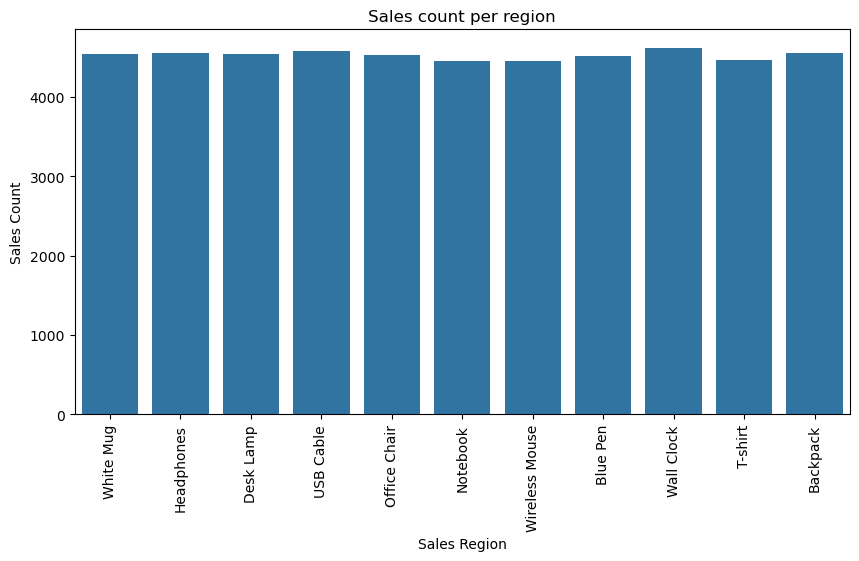

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Description',data=df)
plt.xticks(rotation=90)
plt.xlabel('Sales Region')
plt.ylabel('Sales Count')
plt.title('Sales count per region')
plt.show()

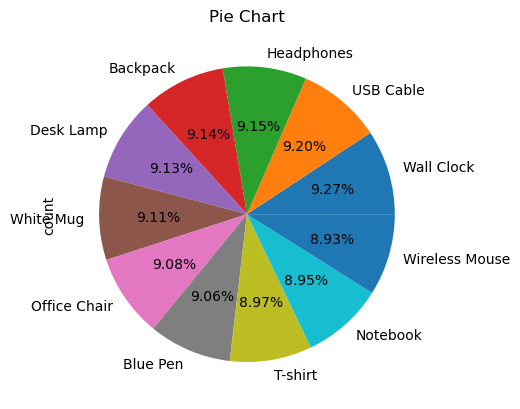

In [26]:
df.value_counts('Description').plot.pie(autopct='%.2f%%')
plt.title('Pie Chart')
plt.show()

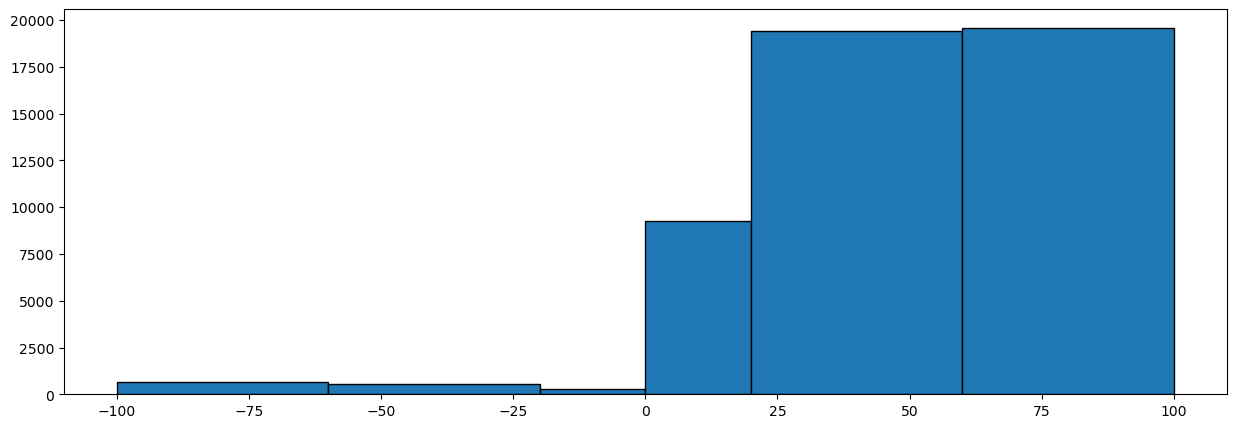

In [27]:
plt.figure(figsize=(15,5))
plt.hist(df['UnitPrice'],edgecolor='black',bins=[-100,-60,-20,0,20,60,100])
plt.show()

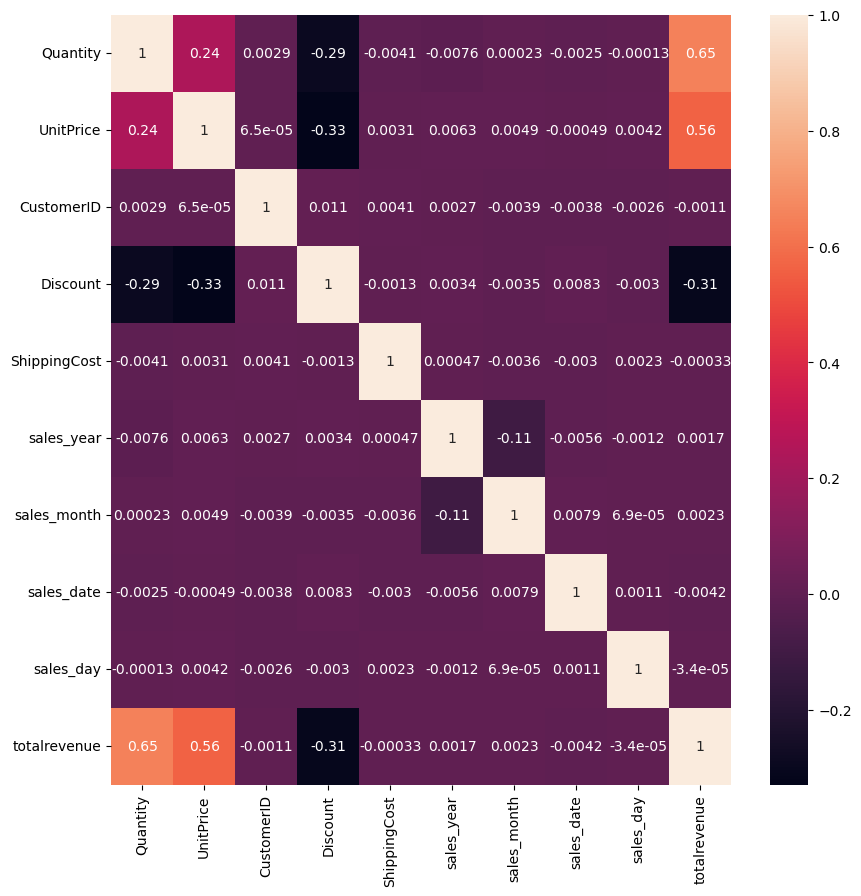

In [30]:
num_df=df.select_dtypes(include='number')
num_df.drop(['InvoiceNo'],axis=1,inplace=True)

plt.figure(figsize=(10,10))
num_corr_df=num_df.corr()
sns.heatmap(num_corr_df,annot=True)
plt.show()

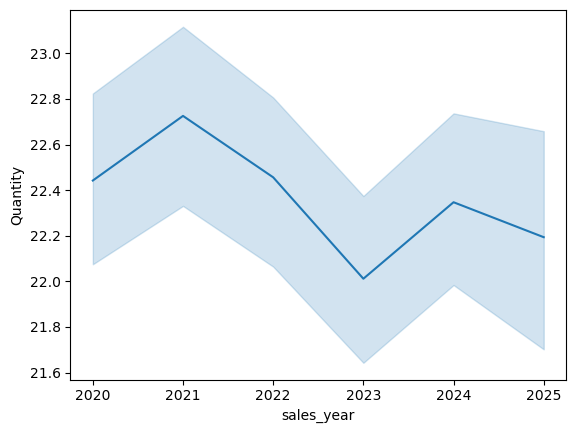

In [31]:
sns.lineplot(x='sales_year',y='Quantity',data=df)
plt.show() 

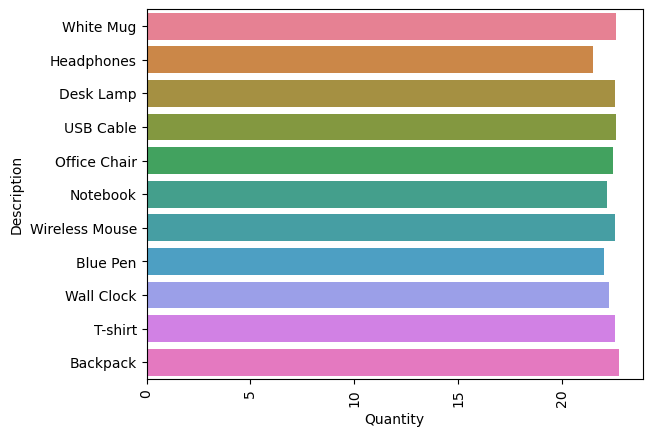

In [32]:
sns.barplot(y='Description',x='Quantity',data=df,orient='h',errorbar=None,hue='Description')
plt.xticks(rotation=90)
plt.show()